In [4]:
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.linear_model as skllm
%matplotlib inline

Multiple Linear Regression 
We define the following: 
1. a function that takes a dataframe, independent variables and dependent variable and returns a features matrix with an additional column for a constant. 

2. a function that takes a vector of weights and the features matrix to estimate predicted values 

3. a function that calculates partial derivatives of the cost function (RSS) for a given set of weights

4. a function that implements a gradient descent algorithm where weights on every feature are iteratively updated as magnitude of the gradient (the sqrt of the sum of all partial derivatives)and returns a vector of the final weights once the magnitude of the gradient hits a threshold (lowest value accepted)

In [5]:
sales_data = pd.read_csv("kc_house_data.csv")
#splitting data into train and test sets
train_sales = pd.read_csv("kc_house_train_data.csv")
test_sales = pd.read_csv("kc_house_test_data.csv")

In [6]:
def get_features_matrix(dataframe, features, output):
    #adding an extra column
    dataframe['constant'] = 1
    features = ['constant'] + features
    #print(features)
    features_matrix = dataframe[features].to_numpy()
    output_array = dataframe[output].to_numpy()
    #print(features_matrix)
    return (features_matrix,output_array)

In [7]:
def predict_outcome(features_matrix,weights):
    predictions = np.dot(features_matrix, weights)
    return (predictions)

In [8]:
def feature_derivative(errors, feature):
    derivative = 2*np.dot(feature,errors)
    return (derivative)

In [9]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False 
    weights = np.array(initial_weights) # make sure it's a numpy array
    while not converged:
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_outcome(feature_matrix, weights)
        # compute the errors as predictions - output
        errors = predictions - output
        gradient_sum_squares = 0 # initialize the gradient sum of squares
        # while we haven't reached the tolerance yet, update each feature's weight
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:, i] is the feature column associated with weights[i]
            # compute the derivative for weight[i]:
            derivative = feature_derivative(errors, feature_matrix[:, i])
            # add the squared value of the derivative to the gradient magnitude (for assessing convergence)
            gradient_sum_squares += (derivative**2)
            # subtract the step size times the derivative from the current weight
            weights[i] -= (step_size * derivative)
        # compute the square-root of the gradient sum of squares to get the gradient matnigude:
        gradient_magnitude = sqrt(gradient_sum_squares)
        #print('gradient magnitude is: ', str(gradient_magnitude))
        if gradient_magnitude < tolerance:
            converged = True
    return(weights)

In [10]:
#train weights
#Model 1
simple_features = ['sqft_living']
my_output = 'price'
(strain_feature_matrix, train_output) = get_features_matrix(train_sales, simple_features, my_output)
print(strain_feature_matrix.shape)
initial_weights_t = np.array([-47000., 1.])
t_step_size = 7e-12
t_tolerance = 2.5e7

(17384, 2)


Quiz Question:
What is the value of the weight for sqft_living from your gradient descent predicting house prices (model 1)? Round your answer to 1 decimal place.

In [11]:
#train weights gradient descent function
simple_train_weights = regression_gradient_descent(strain_feature_matrix, train_output, initial_weights_t,t_step_size, t_tolerance)
simple_train_weights

array([-46999.88716555,    281.91211918])

In [12]:
(test_simple_features_matrix, test_output)  = get_features_matrix(test_sales, simple_features, my_output)
test_simple_features_matrix

array([[   1, 1430],
       [   1, 2950],
       [   1, 1710],
       ...,
       [   1, 2520],
       [   1, 2310],
       [   1, 1020]], dtype=int64)

Quiz Question:
What is the predicted price for the 1st house in the TEST data set for model 1 (round to nearest dollar)?

In [13]:
test_predictions = predict_outcome(test_simple_features_matrix, simple_train_weights)
test_predictions[0]

356134.4432550024

In [250]:
test_residuals = test_output - test_predictions
test_RSS = (test_residuals**2).sum()
test_RSS

275400044902128.3

In [14]:
#train gradient function multiple features
#Model 2
multiple_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(multiple_feature_matrix, multiple_output) = get_features_matrix(train_sales, multiple_features, my_output)
print(multiple_feature_matrix.shape)
initial_weights_m = np.array([-100000, 1., 1.])
step_size_m = 4e-12
tolerance_m = 1e9

(17384, 3)


In [20]:
multiple_train_weights = regression_gradient_descent(multiple_feature_matrix, multiple_output, initial_weights_m,step_size_m, tolerance_m)
multiple_train_weights

array([-9.99999688e+04,  2.45072603e+02,  6.52795267e+01])

In [21]:
(test_multiple_feature_matrix, test_multiple_output) = get_features_matrix(test_sales,multiple_features, my_output)
test_predictions_m = predict_outcome(test_multiple_feature_matrix,multiple_train_weights)
test_predictions_m[0]

366651.4116294939

Quiz Question: Question 4
Which estimate was closer to the true price for the 1st house on the TEST data set, model 1 or model 2?

In [22]:
abs_difference_dict = {'model_1':abs(test_sales['price'][0]-test_predictions[0]), 'model_2':abs(test_sales['price'][0]-test_predictions_m[0])}
minimum = min(abs_difference_dict.values())
print('the model with predicted values closer to the true price is {}'.format(min(abs_difference_dict, key=abs_difference_dict.get)))

the model with predicted values closer to the true price is model_1


Quiz Question: Which model (1 or 2) has lowest RSS on all of the TEST data?

In [23]:
test_residuals_m = test_output - test_predictions_m
test_RSS_m = (test_residuals_m**2).sum()
RSS = {'model_1':test_RSS, 'model_2':test_RSS_m}
print('the model with lowest RSS {}'. format(min(RSS, key=lambda k: RSS[k])))

NameError: name 'test_RSS' is not defined

Polynomial Features Matrix 
1. Split data into train, validation and test sets to extract weights using train data, select the model complexity using validation data, and proxy generalization error using test data. 

2. define a function that takes in a dataframe, , and maximal degree to return a features matrix, where columns are polynomial functions of a single variable. it also adds an additional column for the intercept

In [24]:
train_data = pd.read_csv('wk3_kc_house_train_data.csv')
test_data = pd.read_csv('wk3_kc_house_test_data.csv')
valid_data = pd.read_csv('wk3_kc_house_valid_data.csv')
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv')

In [25]:
def polynomial_dataframe(feature, degree):
    #initialize a pandas dataframe
    polynomial_dataframe = pd.DataFrame()
    #insert a column of the independent variable
    polynomial_dataframe['power_1'] = feature
    #populate additional columns upto a maximal degree of the independent variable 
    if degree > 1: 
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            polynomial_dataframe[name] = feature**power 
    #return dataframe 
    return(polynomial_dataframe)

In [26]:
sqft_living_poly = polynomial_dataframe(sales_data['sqft_living'],15)
sqft_living_poly['price'] = sales_data['price']
sqft_living_poly.sort_values('power_2')

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
19452,290,84100,24389000,7072810000,2051114900000,594823321000000,172498763090000000,-5315590925028654848,8005133933292429824,-2800912632598854656,-607924210447579136,8169419707297566720,7948473681471741952,-785641586888785920,-6475131313233297408,142000.0
15381,370,136900,50653000,18741610000,6934395700000,2565726409000000,949318771330000000,759807991618519296,4427795793208865280,-3475779072869940224,5233828197790730240,-391694556932730880,2646966524565987328,1700178182809075712,1876629133233258496,276000.0
860,380,144400,54872000,20851360000,7923516800000,3010936384000000,1144155825920000000,-7942643919429238784,7061338705255727104,8530817309291315200,-4916379442181308416,-5103036584232484864,-2245774268841328640,-4843994769065508864,3956395126061793280,245000.0
18379,384,147456,56623104,21743271936,8349416423424,3206175906594816,1231171548132409344,-6845471433603153920,-9223372036854775808,0,0,0,0,0,0,265000.0
4868,390,152100,59319000,23134410000,9022419900000,3518743761000000,1372310066790000000,245347910523003136,3451964735423464960,-346070565645933568,-5840312085947230208,-8772192453144932352,-8507403090256568320,2526728067657646080,7746510479875735552,228000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,9640,92929600,895841344000,8635910556160000,-8983542607165358080,6112692992292945920,7459874275690807296,7779618339550134272,-8940610439742488576,-4296326746564722688,-3649391405983334400,-2192205115228684288,7111397666629615616,5772528404800733184,-6653048102649331712,4668000.0
9254,9890,97812100,967361669000,9567206906410000,2385955935847141920,3718535253717071936,-6494023715004475264,5668323262398365952,61825116511904256,2707847870317888512,-4056957582351562752,-1642129138680852480,-7522396689225605120,-784407170612969472,8292337669453152256,6885000.0
3914,10040,100801600,1012048064000,10160962562560000,-8664400314154909696,4265897498952073216,-3728849674763763712,-9207009071507439616,-1736524576130596864,-2533594695666237440,769333156447780864,-5080876148582252544,-6749167958905323520,-6755324674265055232,5218229408866762752,7062500.0
7252,12050,145202500,1749690125000,21083766006250000,-4195036656621222624,-6112950321561191360,-3202288490116285312,3012296299143971072,-5021932375546162688,-8964563563931089920,1142350273500727296,4049716696438411264,7448117121091706880,6401390558099292160,-7527491156874330112,7700000.0


Model Complexity: Linear polynomial function

In [27]:
model_1 = skllm.LinearRegression()

In [28]:
sqft_living_poly1 = polynomial_dataframe(sales_data['sqft_living'],1)
sqft_living_poly1_features = sqft_living_poly1.columns
sqft_living_poly1['price'] = sales_data['price']
x = np.array(sqft_living_poly1[sqft_living_poly1_features]).reshape(-1,1)
Y = np.array(sqft_living_poly1['price'])

In [29]:
sqft_living_poly1_features = sqft_living_poly1.columns
sqft_living_poly1_features

Index(['power_1', 'price'], dtype='object')

In [30]:
model_1.fit(x,Y)

LinearRegression()

In [31]:
print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_) 
print('r_squared:', model_1.score(x,Y))


intercept: -43580.74309447361
slope: [280.6235679]
r_squared: 0.4928532179037931


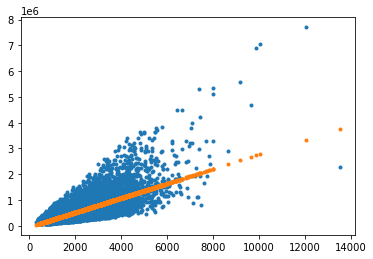

In [37]:
plt.plot(sqft_living_poly1['power_1'], sqft_living_poly1['price'], '.',sqft_living_poly1['power_1'], model_1.predict(x), '.')

the best fitting curve is a line with parameters, a constant and the value of the independent variable itself. 
This does not look like a good fit to the data, therefore we can increase model complexity


Model Complexity: Quadratic polynomial function

In [38]:
sqft_living_poly2 = polynomial_dataframe(sales_data['sqft_living'],2)
sqft_living_poly2_features = sqft_living_poly2.columns
sqft_living_poly2['price'] = sales_data['price']
x2 = np.array(sqft_living_poly2[sqft_living_poly2_features]).reshape(2,-2)
Y2 = np.array(sqft_living_poly2['price'])

In [39]:
x2 = np.array(sqft_living_poly2[sqft_living_poly2_features])
x2.shape, Y2.shape

((21613, 2), (21613,))

In [40]:
model_2 = skllm.LinearRegression()
model_2.fit(x2,Y2)

LinearRegression()

In [46]:
print('intercept:', model_2.intercept_)
print('slope:', model_2.coef_) 
print('r_squared:', model_2.score(x2,Y2))
model_2.predict(x2)

intercept: 199222.27930548543
slope: [6.79940947e+01 3.85812609e-02]
r_squared: 0.5327430940591443


array([333175.85876368, 628792.4730121 , 274452.56182321, ...,
       308716.19976406, 406780.85880199, 308716.19976406])

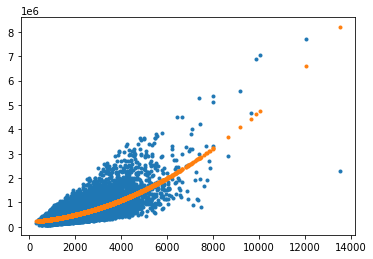

In [42]:
plt.plot(sqft_living_poly2['power_1'], sqft_living_poly2['price'],'.',sqft_living_poly2['power_1'], model_2.predict(x2), '.')

a quadratic function of the variable seems like a better fit for the data

Model Complexity: Cubic polynomial function

intercept: 336819.7482229535
slope: [-9.01819864e+01  8.70465089e-02 -3.84055260e-06]
r_squared: 0.5390045510503199


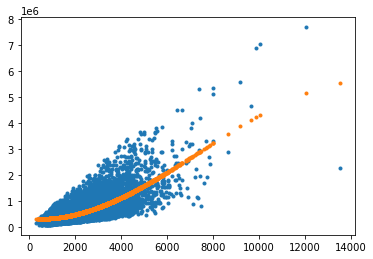

In [44]:
sqft_living_poly3 = polynomial_dataframe(sales_data['sqft_living'],3)
sqft_living_poly3_features = sqft_living_poly3.columns
sqft_living_poly3['price'] = sales_data['price']
x3 = np.array(sqft_living_poly3[sqft_living_poly3_features])
Y3 = np.array(sqft_living_poly3['price'])
model_3 = skllm.LinearRegression()
model_3.fit(x3,Y3)
print('intercept:', model_3.intercept_)
print('slope:', model_3.coef_) 
print('r_squared:', model_3.score(x3,Y3))
plt.plot(sqft_living_poly3['power_1'], sqft_living_poly3['price'], '.',sqft_living_poly3['power_1'], model_3.predict(x3), '.')

Model Complexity: 15th degree polynomial function

intercept: 279936.46914722753
slope: [ 1.71283726e-05  4.21879886e-02  4.60020311e-06 -4.52422175e-10
 -2.28236925e-14 -2.29614568e-16 -5.25167922e-16  3.49514823e-16
 -2.02568178e-16 -2.65721376e-16  1.00194268e-16  7.24085312e-16
  4.24115238e-16 -4.03774328e-16  4.42002926e-17]
r_squared: 0.5421023116183661


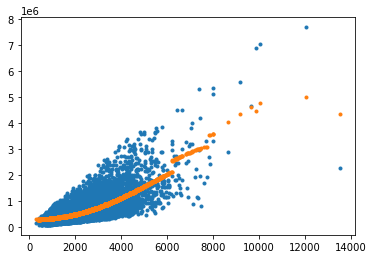

In [47]:
sqft_living_poly15 = polynomial_dataframe(sales_data['sqft_living'],15)
sqft_living_poly15_features = sqft_living_poly15.columns
sqft_living_poly15['price'] = sales_data['price']
x15 = np.array(sqft_living_poly15[sqft_living_poly15_features])
Y15 = np.array(sqft_living_poly['price'])
model_15 = skllm.LinearRegression()
model_15.fit(x15,Y15)
print('intercept:', model_15.intercept_)
print('slope:', model_15.coef_) 
print('r_squared:', model_15.score(x15,Y15))
plt.plot(sqft_living_poly15['power_1'], sqft_living_poly15['price'], '.',sqft_living_poly15['power_1'], model_15.predict(x15), '.')

Split the sales data into four subsets of roughly equal size. Then train a 15th degree polynomial model on all four subsets of the data. 

In [54]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

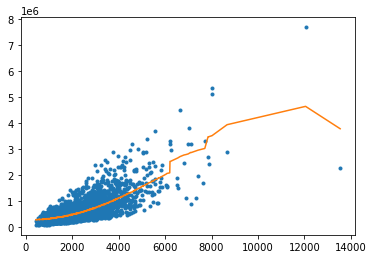

In [55]:
set1_sqft_living_poly = polynomial_dataframe(set_1['sqft_living'],15)
set1_sqft_living_poly_features = set1_sqft_living_poly.columns
set1_sqft_living_poly['price'] = set_1['price']
set1_x15 = np.array(set1_sqft_living_poly[set1_sqft_living_poly_features])
set1_Y15 = np.array(set1_sqft_living_poly['price'])
set1_model_15 = skllm.LinearRegression()
set1_model_15.fit(set1_x15,set1_Y15)
#print('intercept:', set1_model_15.intercept_)
#print('slope for power_15:', set1_model_15.coef_) 
#print('r_squared:', set1_model_15.score(set1_x15,set1_Y15))
predictions_set_1 = set1_model_15.predict(set1_x15)
plt.plot(set1_sqft_living_poly['power_1'], set1_sqft_living_poly['price'], '.')
plt.plot(set1_sqft_living_poly['power_1'], predictions_set_1 , '-')

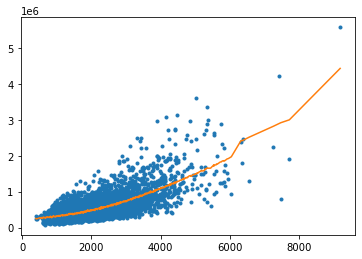

In [56]:
set2_sqft_living_poly = polynomial_dataframe(set_2['sqft_living'],15)
set1_sqft_living_poly_features = set2_sqft_living_poly.columns
set2_sqft_living_poly['price'] = set_2['price']

set2_x15 = np.array(set2_sqft_living_poly[set1_sqft_living_poly_features])
set2_Y15 = np.array(set2_sqft_living_poly['price'])
set2_model_15 = skllm.LinearRegression()
set2_model_15.fit(set2_x15,set2_Y15)
#print('intercept:', set2_model_15.intercept_)
#print('slope for power_15:', set2_model_15.coef_) 
#print('r_squared:', set2_model_15.score(set2_x15,set2_Y15))
plt.plot(set2_sqft_living_poly['power_1'], set2_sqft_living_poly['price'], '.')
plt.plot(set2_sqft_living_poly['power_1'], set2_model_15.predict(set2_x15), '-')

intercept: 251836.97146979917
slope for power_15: [ 3.06040268e-05  6.77524111e-02 -5.35887341e-06  4.62209829e-10
 -1.31471080e-14 -1.42358238e-16 -3.60833621e-16  5.65503096e-16
  4.35861851e-16  5.28464990e-16 -2.21575141e-16  1.13152437e-15
  6.07220706e-16  3.29339151e-16 -2.59168381e-16]
r_squared: 0.5663909028752889


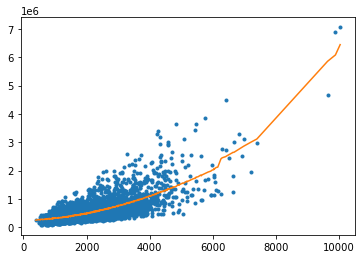

In [57]:
set3_sqft_living_poly = polynomial_dataframe(set_3['sqft_living'],15)
set3_sqft_living_poly_features = set3_sqft_living_poly.columns
set3_sqft_living_poly['price'] = set_3['price']
set3_x15 = np.array(set3_sqft_living_poly[set3_sqft_living_poly_features])
set3_Y15 = np.array(set3_sqft_living_poly['price'])
set3_model_15 = skllm.LinearRegression()
set3_model_15.fit(set3_x15,set3_Y15)
print('intercept:', set3_model_15.intercept_)
print('slope for power_15:', set3_model_15.coef_) 
print('r_squared:', set3_model_15.score(set3_x15,set3_Y15))
plt.plot(set3_sqft_living_poly['power_1'], set3_sqft_living_poly['price'], '.')
plt.plot(set3_sqft_living_poly['power_1'], set3_model_15.predict(set3_x15), '-')

intercept: 269783.16780263773
slope for power_15: [ 2.92540496e-05  5.47251806e-02 -1.42373522e-06  7.25740599e-11
  3.46682562e-14 -1.24271725e-15 -4.01277794e-16  8.93804740e-16
 -4.96004837e-16 -5.39429373e-16  2.61186423e-16  3.95151655e-16
  2.88213711e-16 -1.03711508e-15 -3.22110900e-16]
r_squared: 0.49305028117422933


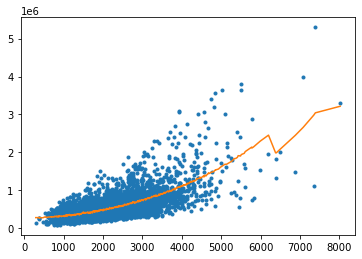

In [58]:
set4_sqft_living_poly = polynomial_dataframe(set_4['sqft_living'],15)
set4_sqft_living_poly_features = set4_sqft_living_poly.columns
set4_sqft_living_poly['price'] = set_4['price']
set4_x15 = np.array(set4_sqft_living_poly[set4_sqft_living_poly_features])
set4_Y15 = np.array(set4_sqft_living_poly['price'])
set4_model_15 = skllm.LinearRegression()
set4_model_15.fit(set4_x15,set4_Y15)
print('intercept:', set4_model_15.intercept_)
print('slope for power_15:', set4_model_15.coef_) 
print('r_squared:', set4_model_15.score(set4_x15,set4_Y15))
plt.plot(set4_sqft_living_poly['power_1'], set4_sqft_living_poly['price'], '.')
plt.plot(set4_sqft_living_poly['power_1'], set4_model_15.predict(set4_x15), '-')

In [59]:
def RSS(model, x_values, y_values):
    residuals = model.predict(x_values) - y_values
    RSS = (residuals**2).sum()
    return RSS

In [60]:
Model_keys = ['set_1', 'set_2', 'set_3', 'set_4']
coefficients = [set1_model_15.coef_[14], set2_model_15.coef_[14],set3_model_15.coef_[14], set4_model_15.coef_[14]]
RSS_list = [RSS(set1_model_15, set1_x15, set1_Y15), RSS(set2_model_15, set2_x15, set2_Y15),RSS(set3_model_15, set3_x15, set3_Y15), RSS(set4_model_15, set4_x15, set4_Y15)]
RSS_dict = dict(zip(Model_keys, RSS_list))
power_15 = dict(zip(Model_keys, coefficients))
print('the set with lowest RSS {}'.format(min(RSS_dict, key=lambda k: RSS_dict[k])))

the set with lowest RSS set_2


Quiz Question: 
Is the sign (positive or negative) for power_15 the same in all four models?

In [279]:
power_15

{'set_1': -3.8020150372957947e-16,
 'set_2': 1.3401533436541994e-15,
 'set_3': -2.591683811604783e-16,
 'set_4': -3.2211089991161973e-16}

Since the variance in estimates of weights on the 15th power vary so much, the model complexity is has low bias but high variance. 
This can also be see in the wildly changing best fitting lines plotted below

Quiz Question: The plotted fitted lines all look the same in all four plots? (True/False)

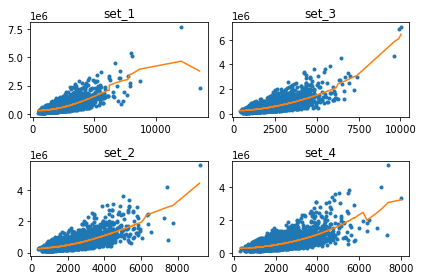

In [183]:
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(set1_sqft_living_poly['power_1'], set1_sqft_living_poly['price'], '.',set1_sqft_living_poly['power_1'], predictions_set_1 , '-')
axs[0, 0].set_title("set_1")
axs[1,0].plot(set2_sqft_living_poly['power_1'], set2_sqft_living_poly['price'], '.',set2_sqft_living_poly['power_1'], set2_model_15.predict(set2_x15), '-')
axs[1, 0].set_title("set_2")
axs[0,1].plot(set3_sqft_living_poly['power_1'], set3_sqft_living_poly['price'], '.',set3_sqft_living_poly['power_1'], set3_model_15.predict(set3_x15), '-')
axs[0, 1].set_title("set_3")
axs[1,1].plot(set4_sqft_living_poly['power_1'], set4_sqft_living_poly['price'], '.',set4_sqft_living_poly['power_1'], set4_model_15.predict(set4_x15), '-')
axs[1, 1].set_title("set_4")
fig.tight_layout()

defining a function to implement a polynomial regression on training data to learn weights which are then used to estimate the RSS on a validation to  select model complexity

In [113]:
def poly_regression_alternative(dataframe1, dataframe2, independent, dependent):
    RSS = []
    for degree in range(1,16):
        poly_frame1 = polynomial_dataframe(dataframe1[independent], degree)
        poly_frame1_features = poly_frame1.columns
        poly_frame1[dependent] = dataframe1[dependent]
        model = skllm.LinearRegression()
        x = np.array(poly_frame1[poly_frame1_features])
        Y = np.array(poly_frame1[dependent])
        model.fit(x,Y)
        #print('polynomial regression model of degree:', degree )
        #print('intercept:', model.intercept_)
        #print('slope:', pd.DataFrame(model.coef_))
        #print('        ')
        validation_polyframe = polynomial_dataframe(dataframe2[independent], degree)
        predictions = model.predict(validation_polyframe)
        validation_polyframe[dependent] = dataframe2[dependent]
        residuals = validation_polyframe[dependent] - predictions
        rss = sum(residuals**2)
        RSS.append(rss)
        #print(degree)
        #print(RSS)
        #print('             ')
    print(RSS.index(min(RSS)))
    print(min(RSS))

Quiz Question: Question 3
Which degree (1, 2, …, 15) had the lowest RSS on Validation data?

In [114]:
poly_regression_alternative(train_data, valid_data, 'sqft_living', 'price')
RSS

6
623170277145831.0


136766797835253.67

Quiz Question:
What is the RSS on TEST data for the model with the degree selected from Validation data? (Make sure you got the correct degree from the previous question)

In [115]:
poly_frame1 = polynomial_dataframe(train_data['sqft_living'], 6)
poly_frame1_features = poly_frame1.columns
poly_frame1['price'] = train_data['price']
model = skllm.LinearRegression()
x = np.array(poly_frame1[poly_frame1_features])
Y = np.array(poly_frame1['price'])
model.fit(x,Y)
test_polyframe = polynomial_dataframe(test_data['sqft_living'], 6)
predictions = model.predict(test_polyframe)
test_polyframe['price'] = test_data['price']
residuals = test_polyframe['price'] - predictions
RSS = sum(residuals**2)
RSS

136766797835253.67

Ridge Regression 

Minimizes a cost function that is a function of the goodness of fit measure RSS and the l2_norm of the magnitude of the weights vector. 
This model will select the degree for which the model error is minimized, scaled by a ridge penalty for model complexity

We will try both low and high penalties


In [120]:
def poly_regression_ridge(dataframe, independent, dependent, degree, l2_penalty):
        poly_frame = polynomial_dataframe(dataframe[independent], degree)
        poly_frame_features = poly_frame.columns
        poly_frame[dependent] = dataframe[dependent]
        model = skllm.Ridge(alpha = l2_penalty, normalize = True)
        x = np.array(poly_frame[poly_frame_features])
        Y = np.array(poly_frame[dependent])
        model.fit(x,Y)
        print('polynomial regression model of degree:', degree )
        print('intercept:', model.intercept_)
        print('slope:', model.coef_[1])
        print('        ')
        plt.plot(poly_frame['power_1'], poly_frame['price'], '.')
        plt.plot(poly_frame['power_1'], model.predict(x), '-')
        return(model.coef_[1])

In [123]:
degree = 15
l2_small_penalty = 1e-9 #low

Next, we use four subsets (set_1, set_2, set_3, set_4) and fit a 15th order polynomial model using each of the subsets.

polynomial regression model of degree: 15
intercept: 227417.2290426453
slope: 0.01982352986750389
        


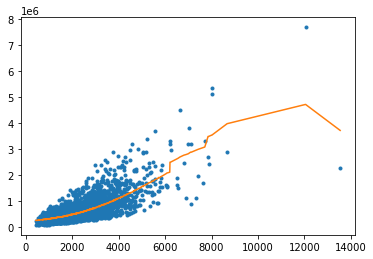

In [125]:
set1 = poly_regression_ridge(set_1, 'sqft_living', 'price', 15, 1e-9)

polynomial regression model of degree: 15
intercept: 398707.2633988983
slope: 0.16913036430729705
        


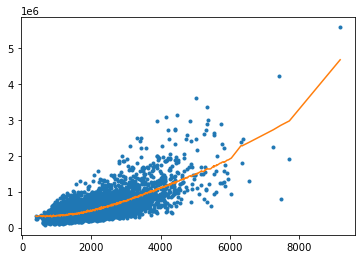

In [126]:
set2 = poly_regression_ridge(set_2, 'sqft_living', 'price', 15, 1e-9)

polynomial regression model of degree: 15
intercept: 389087.9229277379
slope: 0.1575317295688671
        


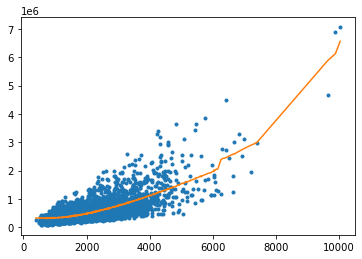

In [127]:
set3 = poly_regression_ridge(set_3, 'sqft_living', 'price', 15, 1e-9)

polynomial regression model of degree: 15
intercept: 290807.15926167084
slope: 0.0733755963783122
        


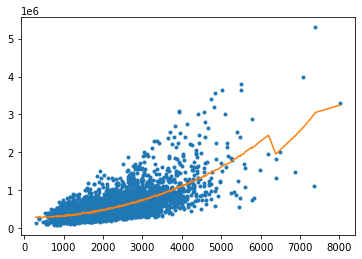

In [128]:
set4 = poly_regression_ridge(set_4, 'sqft_living', 'price', 15, 1e-9)

Quiz Question: For the models learned in each of these training sets, what are the smallest value you learned for the coefficient of feature power_1? Choose the range that contains this value.


Quiz Question:  For the models learned in each of these training sets, what are the largest value you learned for the coefficient of feature power_1? Choose the range that contains this value.   
    

In [129]:
power_1_coefficients = dict(zip(Model_keys, [set1, set2, set3, set4]))
print('model with the lowest coefficient value {} is {}'.format(min(power_1_coefficients.values()),min(power_1_coefficients, key=lambda k: power_1_coefficients[k]))) 
print('model with the highest coefficient value {} is {}'.format(max(power_1_coefficients.values()),max(power_1_coefficients, key=lambda k: power_1_coefficients[k]))) 


model with the lowest coefficient value 0.01982352986750389 is set_1
model with the highest coefficient value 0.16913036430729705 is set_2


We can conclude from the plots above that best fitting line changes alot whenever the dataset changes, resulting in models that have
- low bias 
- high variance 

where the high variance has not been penalized enough

Using the same 4 subsets (set_1, set_2, set_3, set_4), we train 15th order polynomial models again, but this time we apply a large L2 penalty.

In [148]:
degree = 15
l2__low_penalty = 1e-1 #high

polynomial regression model of degree: 15
intercept: 148532.90604959492
slope: 0.022739143280965702
        


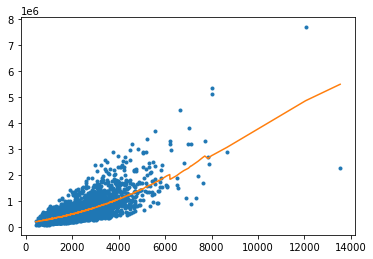

In [149]:
h_set1 = poly_regression_ridge(set_1, 'sqft_living', 'price', 15, 1e-1)

polynomial regression model of degree: 15
intercept: 195641.1511204153
slope: 0.017412573725534983
        


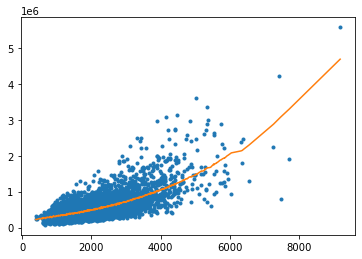

In [150]:
h_set2 = poly_regression_ridge(set_2, 'sqft_living', 'price', 15, 1e-1)

polynomial regression model of degree: 15
intercept: 194829.31282194
slope: 0.017605284643549466
        


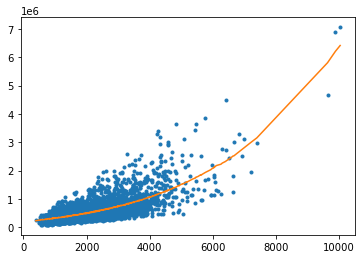

In [151]:
h_set3 = poly_regression_ridge(set_3, 'sqft_living', 'price', 15, 1e-1)

polynomial regression model of degree: 15
intercept: 212806.97052900837
slope: 0.016115946125039318
        


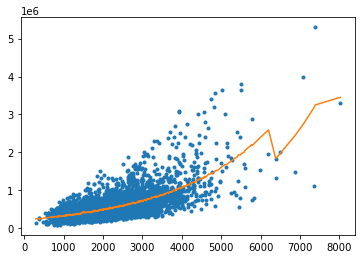

In [152]:
h_set4 = poly_regression_ridge(set_4, 'sqft_living', 'price', 15, 1e-1)

In [296]:
h_power_1_coefficients = dict(zip(Model_keys, [h_set1, h_set2, h_set3, h_set4]))
print('model with the lowest coefficient value {} is {}'.format(min(h_power_1_coefficients.values()),min(h_power_1_coefficients, key=lambda k: h_power_1_coefficients[k]))) 
print('model with the highest coefficient value {} is {}'.format(max(h_power_1_coefficients.values()),max(h_power_1_coefficients, key=lambda k: h_power_1_coefficients[k]))) 


model with the lowest coefficient value 0.000356038340594133 is set_1
model with the highest coefficient value 0.00042006213803074164 is set_3


Ridge regression penalizes this by coercing the magnitudes of the weights to a minimum 
while still aiming to achieve the best the bias-variance balance

l2_penalty is a hyperparameter that needs to be selected from a range of possible values

k-fold cross validation involves dividing the training set into k segments,
for every iteration, one segment is used as the validation set and the rest are training 
for every iteration, model weights are learned and RSS is calculated using the validation set 
an average RSS value after all iterations is calculated and 
this is used as a proxy to the generalization erorr. This method helps with smaller data sets. 

for l2_penalty in a range of possible values, this average k validation error is estimated, and l2_penalty that minimizes the error is selected

In [153]:
#k-fold cross-validation, 
#to understand how validation sets are built 

n = len(train_valid_shuffled)
k = 10 
#every segment gets n/k observations, to be used as validation set
#and n - n/k are remaining for training set 

for i in range(k):
    start = int((n*i)/k)
    end = int((n*(i+1))/k-1)
    #print(i, (start,end))
    validation_set = train_valid_shuffled[start:end+1]
    #print(validation_set.shape)
    train_set = train_valid_shuffled[0:start].append(train_valid_shuffled[end+1:n])
    #print(train_set.shape)
    #print("          ")  

In [154]:
def k_fold_cross_validation(k, l2_penalty, data, independent, dependent, degree):
    n = len(train_valid_shuffled)
    for i in range(k):
        start = int((n*i)/k)
        end = int((n*(i+1))/k-1)
        validation_set = data[start:end+1]
        train_set = data[0:start].append(data[end+1:n])
        #print(i, (start,end))
        
        poly_frame = polynomial_dataframe(train_set[independent], degree)
        poly_frame_features = poly_frame.columns
        poly_frame[dependent] = train_set[dependent]
        model = skllm.Ridge(alpha = l2_penalty, normalize = True)
        x = np.array(poly_frame[poly_frame_features])
        Y = np.array(poly_frame[dependent])
        model.fit(x,Y)
        #print('validation set: ', i)
        #print('polynomial regression model of degree:', degree )
        #print('intercept:', model.intercept_)
        #print('slope:', pd.DataFrame(model.coef_))
        #print('        ')
        poly_frame_valid = polynomial_dataframe(validation_set[independent], degree)
        poly_frame_valid_features = poly_frame_valid.columns
        predictions = model.predict(poly_frame_valid)
        poly_frame_valid[dependent] = validation_set[dependent]
        residuals = validation_set[dependent] - predictions
        rss_sum = sum(residuals**2)
        rss_sum += rss_sum

        average_validation_error = rss_sum/k
    
    return(average_validation_error)

In [155]:
#testing function
k_fold_cross_validation(10, 1.55e+5, train_valid_shuffled,'sqft_living','price', 15)

62665381370572.56

(13, 2)


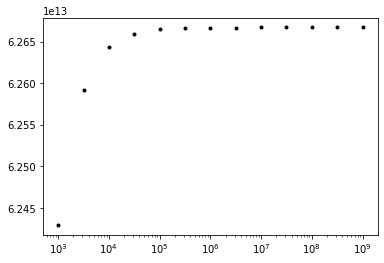

In [159]:
valid_error = np.empty([0,2], int)
for l2_penalty in np.logspace(3,9, num=13):
    val_error = k_fold_cross_validation(10, l2_penalty, train_valid_shuffled,'sqft_living','price', 15)
    valid_error = np.concatenate((valid_error, np.array([[l2_penalty, val_error]])), axis=0)
print(valid_error.shape)
plt.plot(valid_error[:,0], valid_error[:,1], 'k.')
plt.xscale('log')

In [162]:
#fitting the model 
#RSS on test data given the l2_penalty found using k-fold cross-validation 
#and weights learned for that particular l2_penalty using train data

In [163]:
poly_frame_train = polynomial_dataframe(train_sales['sqft_living'], 15)
poly_frame_train_features = poly_frame_train.columns
poly_frame_train['price'] = train_set['price']
model = skllm.Ridge(alpha = 1e+3, normalize = True)
x = np.array(poly_frame_train[poly_frame_train_features])
Y = np.array(poly_frame_train['price'])
model.fit(x,Y)


Ridge(alpha=1000.0, normalize=True)

In [164]:
poly_frame_test = polynomial_dataframe(test_sales['sqft_living'], 15)
poly_frame_test_features = poly_frame_test.columns
predictions = model.predict(poly_frame_test)
poly_frame_test['price'] = test_sales['price']
residuals = test_sales['price'] - predictions
rss = (residuals**2).sum()
print(rss)
        

537228684331234.4


In [165]:
(example_features,example_output) = get_features_matrix(sales_data, ['sqft_living'], 'price')
my_weights = np.array([1.,10.])
test_predictions = predict_outcome(example_features, my_weights)
errors = test_predictions - example_output

'''for i in range(len(my_weights)):
    if i == 0: 
        print(i)
        print(example_features[:,i].reshape(-1,1))'''

'for i in range(len(my_weights)):\n    if i == 0: \n        print(i)\n        print(example_features[:,i].reshape(-1,1))'

In [166]:
def feature_derivative_ridge(errors, feature_matrix, weights, l2_penalty):
    derivative = []
    for i in range(len(weights)):
        if i == 0:
            derivative = np.append(derivative,2*np.dot(errors,feature_matrix[:,i].reshape(-1,1)))
            #print(derivative)
        else:
            derivative = np.append(derivative,2*np.dot(errors,feature_matrix[:,i].reshape(-1,1)) + 2*(l2_penalty*weights[i]))
            #print(derivative)
    return (derivative)

In [167]:
result = feature_derivative_ridge(errors, example_features,my_weights, 1000)
result

array([-2.24467493e+10, -5.65541668e+13])

Ridge Regression Gradient Descent iteratively updates the weights on features, this minimizes the ridge cost function for a given value of l2_penalty

In [170]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations):
    weights = np.array(initial_weights)
    #print(type(weights))
    #print(weights)
    #print(len(weights))
    while max_iterations > 0: 
        predictions = predict_outcome(feature_matrix, weights)
        errors = predictions - output
        #print(weights.shape)
        #print(range(len(weights)))
        derivative = feature_derivative_ridge(errors, feature_matrix, weights, l2_penalty)
        #print(derivative)
        weights = weights - (step_size*derivative)
        max_iterations -= 1
    return(weights)   

In [171]:
(simple_feature_matrix, output) = get_features_matrix(train_sales, ['sqft_living'], 'price')
initial_weights = [0.,0.]
step_size = 1e-12
max_iterations = 1000 
l2_penalty = 0 

zero_penalty_weights = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 0, max_iterations)
zero_penalty_weights

array([-1.63113515e-01,  2.63024369e+02])

In [172]:
high_penalty_weights = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 1e11, max_iterations)
high_penalty_weights

array([  9.76730382, 124.57217567])

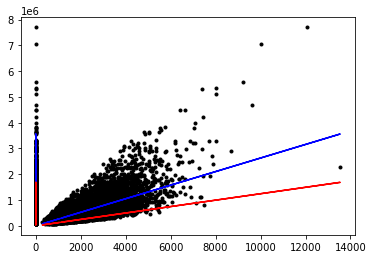

In [173]:
plt.plot(simple_feature_matrix, output, 'k.')
plt.plot(simple_feature_matrix, predict_outcome(simple_feature_matrix, zero_penalty_weights), 'b-', simple_feature_matrix, predict_outcome(simple_feature_matrix, high_penalty_weights),'r-')

In [174]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_features_matrix(train_sales, model_features, my_output)
(test_feature_matrix, test_output) = get_features_matrix(test_sales, model_features, my_output)

In [175]:
initial_weights = np.array([0., 0., 0.])
step_size = 1e-12
max_iterations = 1000

In [176]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 0, max_iterations)
multiple_weights_0_penalty

array([ -0.35743483, 243.05416982,  22.41481497])

In [177]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 1e11, max_iterations)
multiple_weights_high_penalty

array([ 6.74296579, 91.48927365, 78.43658766])

In [178]:
initial_predictions = predict_outcome(test_feature_matrix, initial_weights)
initial_residuals = test_output - initial_predictions
initial_RSS = (initial_residuals**2).sum()
print(initial_RSS)

1784273286136298.0


In [179]:
no_regularization_predictions = predict_outcome(test_feature_matrix, multiple_weights_0_penalty)
no_regularization_residuals = test_output - no_regularization_predictions
no_regularization_RSS = (no_regularization_residuals**2).sum()
print(no_regularization_RSS)

274067615918575.53


In [180]:
regularization_predictions = predict_outcome(test_feature_matrix, multiple_weights_high_penalty)
regularization_residuals = test_output - regularization_predictions
regularization_RSS = (regularization_residuals**2).sum()
print(regularization_RSS)

500404800500841.75


In [181]:
print (no_regularization_predictions[0])
print (test_output[0] - no_regularization_predictions[0])

387465.47605823533
-77465.47605823533


In [182]:
print (regularization_predictions[0])
print (test_output[0] - regularization_predictions[0])

270453.53032194055
39546.46967805945
